# Cap 1: Grafos e redes

### 1.2.7 Análise com Networkx

In [ ]:
# importa Networkx
import networkx as nx

# importa matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

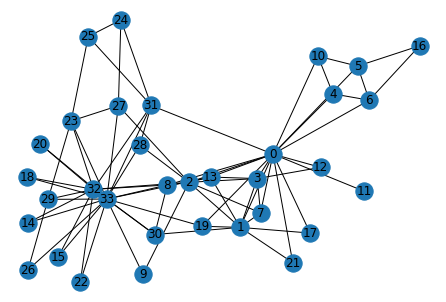

In [3]:
# grafo do clube de karate
G = nx.karate_club_graph() # gera o grafico do clube de karate
nx.draw(G,with_labels = True ) # plota o grafo G

In [4]:
type(G)

networkx.classes.graph.Graph

In [84]:
# mostra os vértices
nodesG = G.nodes()
print("vétices: ", nodesG)

vétices:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


In [85]:
# mostra as arestas como pares de vértices
edgesG = G.edges()
print("Arestas", edgesG)


Arestas [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]


### Desenhando grafos

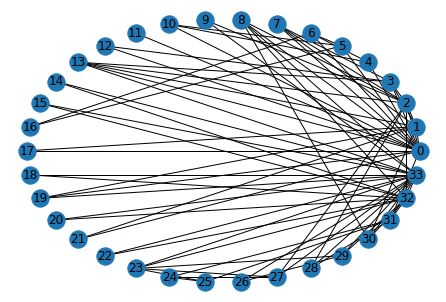

In [34]:
# mostrar o grafo do clube do karate em formato circular
nx.draw_circular (G, with_labels = True )

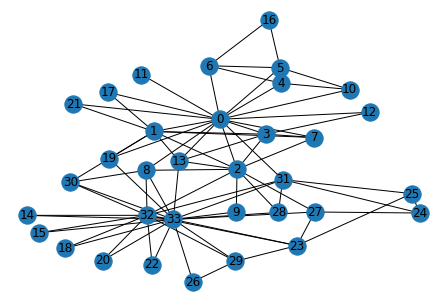

In [36]:
# desenha o grafo G com um "Kamada-Kawai force-directed layout".
nx.draw_kamada_kawai (G, with_labels = True )

In [37]:
# imprime os vizinhos do vértices 12
for n in G.neighbors (12):
    print(n)

0
3


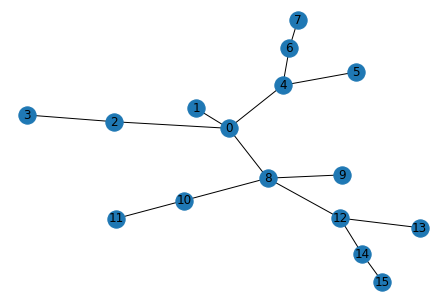

In [45]:
# gera um grafo de uma árvore binomial
# The binomial tree of order 0 consists of a single vertex. 
# A binomial tree of order k is defined recursively by linking two binomial trees of order k-1: 
# the root of one is the leftmost child of the root of the other.
GAB = nx.binomial_tree(4)
nx.draw(GAB, with_labels = "True")

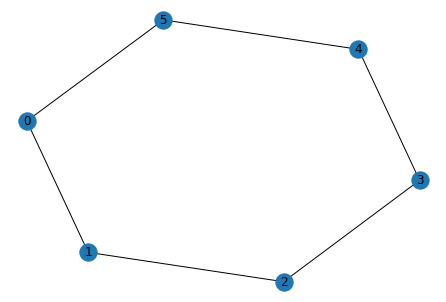

In [48]:
# gera um grafo círculo com 6 nós
GCI = nx.circulant_graph(6 ,[1])
nx.draw(GCI, with_labels="True")

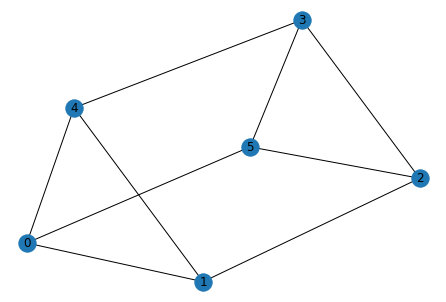

In [49]:
# gerar um grafo regular com 6 nós e 3 arestas por nó
GRE = nx.random_regular_graph(3,6)
nx.draw(GRE, with_labels = "True")

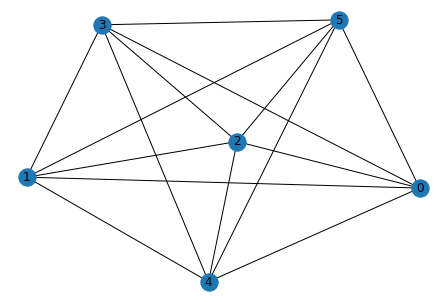

In [13]:
# gerar um grafo completo com 6 nós
GCO = nx.complete_graph(6)
nx.draw(GCO, with_labels = "True")

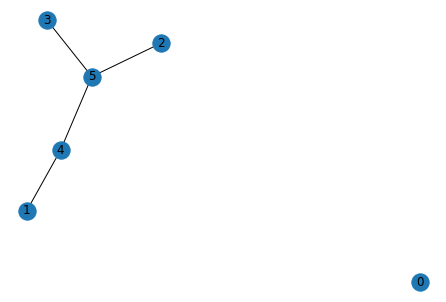

In [14]:
# gera um grafo aleatório de Erdös - Rényi com 6 nós e probabilidade 0.25
GER = nx.gnp_random_graph(6,0.25)
nx.draw(GER, with_labels = "True")

In [50]:
# gerar um grafo direcionado
GD = nx.DiGraph()
type(GD)

networkx.classes.digraph.DiGraph

In [52]:
# adicionando vértices armazenado em uma lista
GD.add_nodes_from (['Avó', 'Avô', 'Pai', 'Mãe', 'Filho', 'Filha'])

In [53]:
# adicionando arestas
GD.add_edge('Avó', 'Pai') # Avó -> Pai
GD.add_edge('Avô', 'Pai') # Avô -> Pai
GD.add_edge('Pai', 'Filho') # Pai -> Filho
GD.add_edge('Pai', 'Filha') # Pai -> Filha
GD.add_edge('Mãe', 'Filho') # Mãe -> Filho
GD.add_edge('Mãe', 'Filha') # Mãe -> Filha

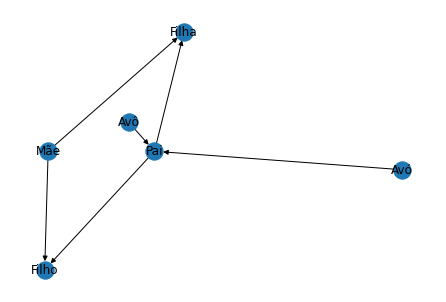

In [54]:
# desenhando o grafo GD
nx.draw(GD, with_labels = "True")

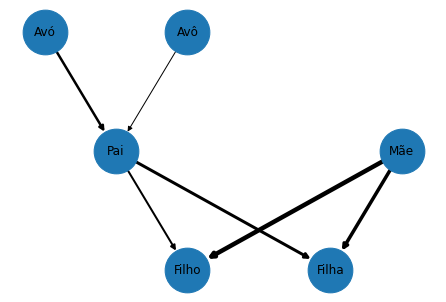

In [55]:
# gerando um grafo direcionado
# lendo os vértices e arestas em um arquivo .txt
GFA = nx.read_edgelist('fami.txt', data = (('peso',float),), create_using = nx.DiGraph)
# definindo a posição dos vértices
pos = nx.circular_layout(GFA)
pos['Avó'] = [-1 ,0]
pos['Avô'] = [+0 ,0]
pos['Pai'] = [-0.5,-0.5]
pos['Mãe'] = [+1.5,-0.5]
pos['Filho'] = [+0.0,-1.0]
pos['Filha'] = [+1.0,-1.0]
# lista da largura das arestas
larg = [(0.5*GFA[u][v]['peso']) for u, v in GFA.edges]
# desennhando o grafo GFA
nx.draw(GFA, pos=pos, node_size=2000, with_labels=True, arrows=True, width=larg )

## 1.3 Métricas Globais de Redes

### 1.3.1 Densidade

Seja uma rede $G=(V,E)$, com $|V|=n$ e $|E|=m$. 

Então, a densidade da rede, $\mathrm{dens}(G)$, é 
- igual a $\dfrac{2m}{n(n-1)}$, se a rede for não direcionada, e 
- igual a $\dfrac{m}{n(n-1)}$ se a rede for direcionada.

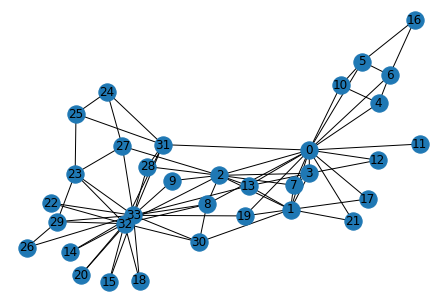

In [20]:
# grafo do clube do karate
karate = nx.karate_club_graph()
nx.draw(karate, with_labels = "True")

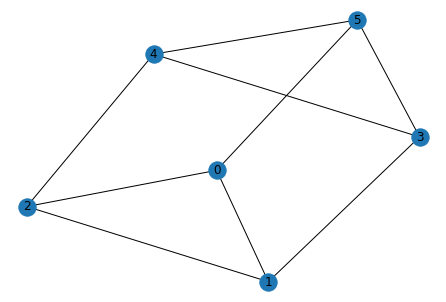

In [21]:
# grafo regular com 6 nós e 3 arestas por nó
gre = nx.random_regular_graph(3,6)
nx.draw(gre, with_labels = "True")

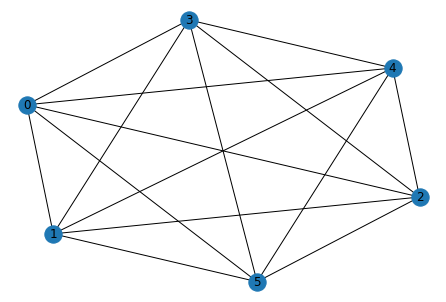

In [22]:
# grafo completo com 6 nós
gco = nx.complete_graph(6)
nx.draw(gco, with_labels = "True")

In [86]:
# imprimindo as densidades
print("Densidades:")
print("karate:", nx.density(karate))
print("gre: ", nx.density(gre))
print("gco: ", nx.density(gco))

Densidades:
karate: 0.13903743315508021
gre:  0.6
gco:  1.0


### 1.3.2 Comprimento médio e caminho

O diâmetro de uma rede é igual ao maior distância geodésica entre dois nós em uma mesma componente da rede. 

Similarmente, o comprimento médio dos caminhos de uma rede é dado pela média de todas as distâncias geodésicas entre dois nós que são conectados na rede.

In [57]:
# caminhos e distância geodésica entre dois vértices
karate = nx.karate_club_graph()
caminho = nx.shortest_path(karate, 3, 20)
longitude = nx.shortest_path_length(karate ,3 ,20)
print("caminho: ", caminho)
print("tamanho: ", longitude)

caminho:  [3, 2, 32, 20]
tamanho:  3


In [58]:
# Comprimento médio dos caminhos do grafo do clube do karate
cm = nx.average_shortest_path_length(karate)

# Diâmetro do grafo do clube do karate
diam = nx.diameter(karate)

print("Comprimento médio =", cm)
print("Diâmentro =", diam)

Comprimento médio = 2.408199643493761
Diâmentro = 5


### 1.3.3 Distribuição de graus

- O grau de um certo vértice de uma rede não direcionada consiste de quantas arestas envolvem este vértice na
rede, ou seja, 
$$d(i) = \displaystyle\sum_{j \in V} A(i,j)$$

- Vértices com alto grau são aqueles que conseguem acessar imediatamente um grande número de vértices.

- Em redes direcionadas, existem dois tipos de grau que dependem da direção das arestas: o grau de saída (out-degree), $d^{out}(i)$, e o grau de entrada (in-degree), $d^{in}(i)$.
$$
d^{out}(i) = \displaystyle\sum_{j \in V} A(i,j)
$$
e
$$
d^{in}(i) = \displaystyle\sum_{j \in V} A(j,i)
$$




In [59]:
# Graus do grafo do clube do karate
karate = nx.karate_club_graph()
a = karate. degree(0) # grau do nó 0
b = list(karate.degree([0 ,1 ,2]) ) # lista de graus dos nós 0 , 1 e 2
c = nx.degree_histogram(karate) # lista com as frequências de ocorrência de graus
print("Grau do vértice 0:", a)
print("Graus dos vértices 0,1,2:", b)
print("Frequências de ocorrência:", c)

Grau do vértice 0: 16
Graus dos vértices 0,1,2: [(0, 16), (1, 9), (2, 10)]
Frequências de ocorrência: [0, 1, 11, 6, 6, 3, 2, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1]


### Agrupamento em Networkx

Redes complexas possuem uma característica de coesão em que nós vizinhos a um certo nó tem uma maior chance de serem vizinhos entre si.

Existem algumas formas de mensurar essa característica, por exemplo, através do conceito de cliques.

Uma maneira de analisar a coesão de uma rede seria analisar a distribuição dos cliques, ou seja, quantos cliques de cada tamanho existem.

Cliques são muito sensíveis a remoção de um nó, assim outras medidas foram propostas para analisar o grau de coesão ou agrupamento da rede. 

O coeficiente de agrupamento total é dado pela proporção de vezes que dois vértices $j$ e $k$ que são vizinhos de um mesmo vértice $i$ também são vizinhos entre si:

$$
cl(G)=
\dfrac{\sum\limits_{(i,j,k):j\ne i,k\ne i,k\ne j}A(i,j)A(i,k)A(j,k)}{\displaystyle\sum\limits_{(i,j,k):j\ne i,k\ne i,k\ne j}A(i,j)A(i,k)}
$$


In [27]:
# calculo do tamanho médio dos cliques
karate = nx.karate_club_graph ()
clqlist = list(nx.enumerate_all_cliques(karate)) # lista com todos os cliques
soma = 0
k = len(clqlist)
for clique in clqlist :
    soma = soma + len(clique)
lonmedia = soma / k
print(" Tamanho médio das cliques:", lonmedia)

 Tamanho médio das cliques: 2.2294117647058824


In [60]:
# gerando grafos

# círculo com 6 nós
gci = nx.circulant_graph(6 ,[1])

# grafo regular com 6 nós e 3 arestas por nó
gre = nx.random_regular_graph(3,6)

# grafo completo com 6 nós
gco = nx.complete_graph(6)

In [65]:
# calculando os coeficientes de agrupamento total
cl_karate = nx.transitivity(karate)
cl_gci = nx.transitivity(gci)
cl_gre = nx.transitivity(gre)
cl_gco = nx.transitivity(gco)

In [66]:
# imprimindo os coeficientes de agrupamento total
print("cl^{d,1}(karate):", cl_karate)
print("cl^{d,1}(gci):", cl_gci)
print("cl^{d,1}(gre):", cl_gre)
print("cl^{d,1}(gco):", cl_gco)

cl^{d,1}(karate): 0.2556818181818182
cl^{d,1}(gci): 0
cl^{d,1}(gre): 0.3333333333333333
cl^{d,1}(gco): 1.0


### Reciprocidade

Em redes direcionadas, uma medida de interesse é saber qual a fração de arestas que ocorrem em ambas as direções.

$$
rc(G)=
\dfrac{\displaystyle\sum\limits_{i,j}A(i,j)A(j,i)}{\displaystyle\sum\limits_{i,j}A(i,j)}.
$$

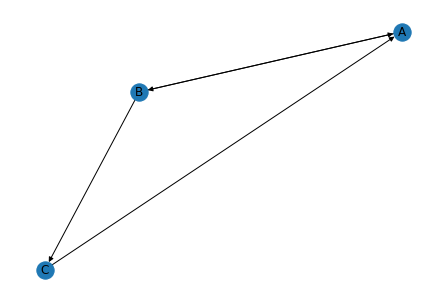

In [67]:
# gerando o grafo direcionado GD
GD = nx.DiGraph ()
GD.add_nodes_from(['A','B','C'])

GD.add_edge('A','B') # A -> B
GD.add_edge('B','A') # B -> A
GD.add_edge('B','C') # B -> C
GD.add_edge('C','A') # C -> A

# plotando o grafo GD
nx.draw(GD, with_labels = "True")

In [68]:
# calculando a reciprocidade do grafo GD
re = nx.reciprocity(GD)

# imprimindo o valor da reciprocidade do grafo GD
print("Reciprocidade GS:", re)

Reciprocidade GS: 0.5
